# Hotel reservations-binary logistic regression

In [1]:
#https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

In [2]:
#import pandas as pd
import numpy as np
import pandas as pd

#to check the data type
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

#for visulazation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#to build and analyze various statistical models we use"statsmodels"
import scipy
import statsmodels
from scipy import stats
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd
#for multicolineraity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
#linear regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
#for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.utils import resample
#for decision tree
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
#Bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
#Adaptive boosting 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
#for random forest 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
#Search methods
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#Naive bayes classifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix, accuracy_score 
import warnings
warnings.filterwarnings("ignore")
np.set_printoptions(suppress=True)

In [3]:
data= pd.read_csv("Hotel Reservations.csv")

#Basic information about data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [5]:
data.duplicated().describe()

count     36275
unique        1
top       False
freq      36275
dtype: object

In [6]:
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [7]:
data.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

In [8]:
data.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [9]:
data.drop(['Booking_ID'],axis=1,inplace=True)

In [10]:
le=LabelEncoder()
data["type_of_meal_plan"]=le.fit_transform(data["type_of_meal_plan"])
data["room_type_reserved"]=le.fit_transform(data["room_type_reserved"])
data["market_segment_type"]=le.fit_transform(data["market_segment_type"])
data["booking_status"]=le.fit_transform(data["booking_status"])

In [11]:
data['no_of_adults']=data['no_of_adults'].astype("O")
data['no_of_children']=data['no_of_children'].astype("O")
data['no_of_weekend_nights']=data['no_of_weekend_nights'].astype("O")                                                               
data['required_car_parking_space']=data['required_car_parking_space'].astype("O")
data['arrival_year']=data['arrival_year'].astype("O")
data['repeated_guest']=data['repeated_guest'].astype("O")
data['no_of_previous_cancellations']=data['no_of_previous_cancellations'].astype("O")
data['no_of_previous_bookings_not_canceled']=data['no_of_previous_bookings_not_canceled'].astype("O")
data['no_of_special_requests']=data['no_of_special_requests'].astype("O")
data['no_of_week_nights']=data['no_of_week_nights'].astype("O")
data["type_of_meal_plan"]=data["type_of_meal_plan"].astype("O")
data["room_type_reserved"]=data["room_type_reserved"].astype("O")
data["market_segment_type"]=data["market_segment_type"].astype("O")
data["booking_status"]=data["booking_status"].astype("O")

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  object 
 1   no_of_children                        36275 non-null  object 
 2   no_of_weekend_nights                  36275 non-null  object 
 3   no_of_week_nights                     36275 non-null  object 
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  object 
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  object 
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [13]:
data.duplicated().info()

<class 'pandas.core.series.Series'>
RangeIndex: 36275 entries, 0 to 36274
Series name: None
Non-Null Count  Dtype
--------------  -----
36275 non-null  bool 
dtypes: bool(1)
memory usage: 35.5 KB


In [14]:
#data.["booking_status"]=="0".head()

In [15]:
data.describe()

,lead_time,arrival_month,arrival_date,avg_price_per_room
count,36275.000000,36275.000000,36275.000000,36275.000000
mean,85.232557,7.423653,15.596995,103.423539
std,85.930817,3.069894,8.740447,35.089424
min,0.000000,1.000000,1.000000,0.000000
25%,17.000000,5.000000,8.000000,80.300000
50%,57.000000,8.000000,16.000000,99.450000
75%,126.000000,10.000000,23.000000,120.000000
max,443.000000,12.000000,31.000000,540.000000


In [16]:
data.describe(include=object)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,arrival_year,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests,booking_status
count,36275,36275,36275,36275,36275,36275,36275,36275,36275,36275,36275,36275,36275,36275
unique,5,6,8,18,4,2,7,2,5,2,9,59,6,2
top,2,0,0,2,0,0,0,2018,4,0,0,0,0,1
freq,26108,33577,16872,11444,27835,35151,28130,29761,23214,35345,35937,35463,19777,24390


In [17]:
data.shape

(36275, 18)

In [18]:
#filter the continous data
data_numeric=data.select_dtypes(include=np.number)
data_numeric

,lead_time,arrival_month,arrival_date,avg_price_per_room
0,224,10,2,65.00
1,5,11,6,106.68
2,1,2,28,60.00
3,211,5,20,100.00
4,48,4,11,94.50
...,...,...,...,...
36270,85,8,3,167.80
36271,228,10,17,90.95
36272,148,7,1,98.39
36273,63,4,21,94.50


In [19]:
data_numeric.columns

Index(['lead_time', 'arrival_month', 'arrival_date', 'avg_price_per_room'], dtype='object')

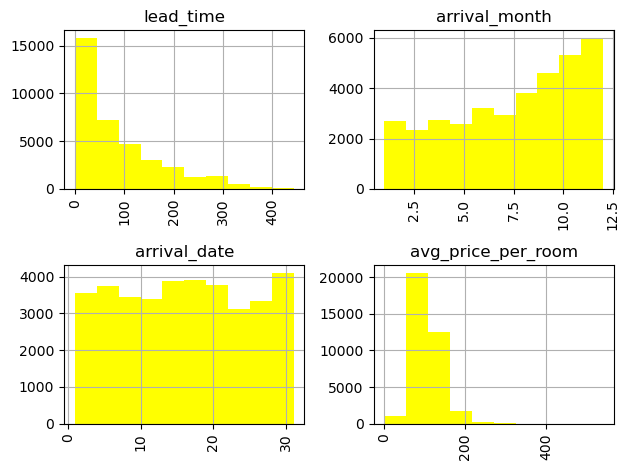

In [20]:
data_numeric.hist(xrot=90,color="yellow")
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='avg_price_per_room'>

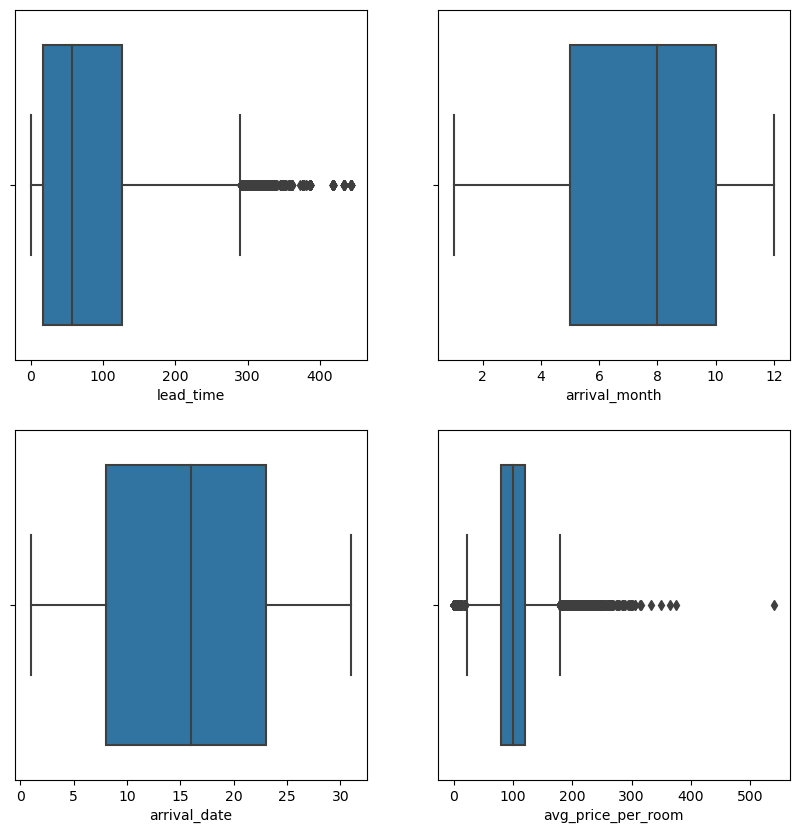

In [21]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.boxplot(x=data['lead_time'],ax=axarr[0,0])
sns.boxplot(x=data['arrival_month'],ax=axarr[0,1])
sns.boxplot(x=data['arrival_date'],ax=axarr[1,0])
sns.boxplot(x=data['avg_price_per_room'],ax=axarr[1,1])

In [22]:
Q1= data.lead_time .quantile(0.25)
Q2= data.lead_time .quantile(0.50)
Q3= data.lead_time .quantile(0.75)
IQR = Q3 - Q1
lowerend = Q1 - (1.5 * IQR)
upperend = Q3 + (1.5 * IQR)

dfdia_outliers = data.lead_time[(data.lead_time < lowerend) | (data.lead_time > upperend)]
len(data.lead_time[data.lead_time> upperend])

1331

In [23]:
data.lead_time= np.where(data.lead_time>upperend ,upperend,data.lead_time)

In [24]:
Q1= data.avg_price_per_room .quantile(0.25)
Q2= data.avg_price_per_room  .quantile(0.50)
Q3= data.avg_price_per_room  .quantile(0.75)
IQR = Q3 - Q1
lowerend = Q1 - (1.5 * IQR)
upperend = Q3 + (1.5 * IQR)

outliers = data.avg_price_per_room [(data.avg_price_per_room < lowerend) | (data.avg_price_per_room  > upperend)]
len(data.avg_price_per_room [data.avg_price_per_room > upperend])

1069

In [25]:
data.avg_price_per_room = np.where(data.avg_price_per_room >upperend ,upperend,data.avg_price_per_room )
data.avg_price_per_room = np.where(data.avg_price_per_room <lowerend ,lowerend,data.avg_price_per_room )

<AxesSubplot:xlabel='avg_price_per_room'>

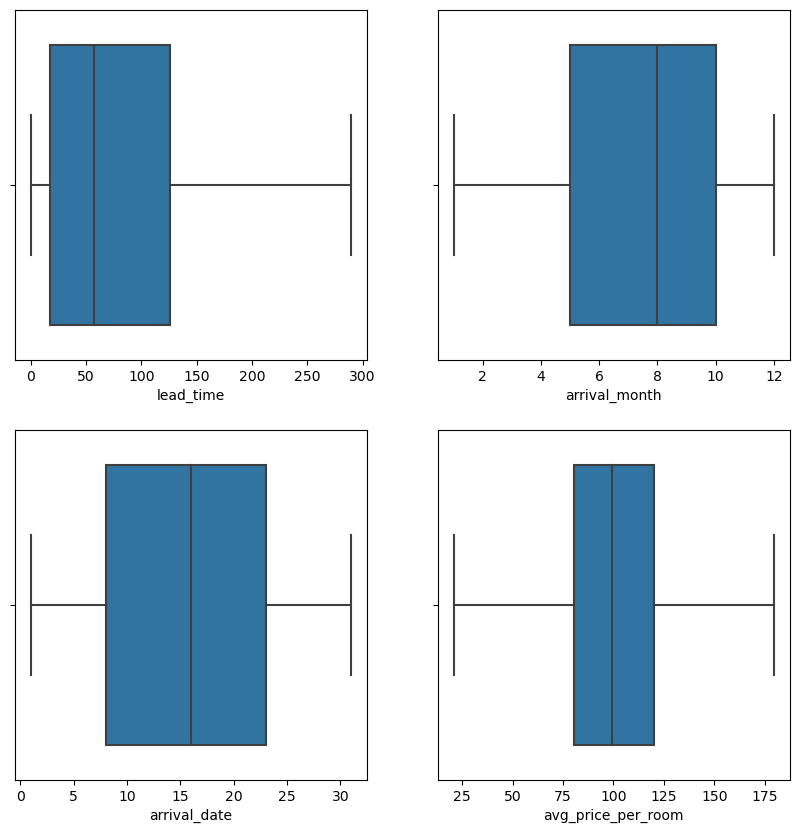

In [26]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.boxplot(x=data['lead_time'],ax=axarr[0,0])
sns.boxplot(x=data['arrival_month'],ax=axarr[0,1])
sns.boxplot(x=data['arrival_date'],ax=axarr[1,0])
sns.boxplot(x=data['avg_price_per_room'],ax=axarr[1,1])

# statical test for continous data

In [27]:
data['booking_status']=data['booking_status'].astype("int")

In [28]:
model = ols('booking_status~lead_time',data =data).fit()
anova = sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
lead_time,1.0,1559.7414,1559.7414,8797.0504,0.0
Residual,36273.0,6431.3034,0.1773,NaN,NaN


In [29]:
model = ols('booking_status~arrival_month',data =data).fit()
anova = sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
arrival_month,1.0,1.0083,1.0083,4.5776,0.0324
Residual,36273.0,7990.0365,0.2203,NaN,NaN


In [30]:
model = ols('booking_status~arrival_date',data =data).fit()
anova = sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
arrival_date,1.0,0.9028,0.9028,4.0985,0.0429
Residual,36273.0,7990.1420,0.2203,NaN,NaN


In [31]:
model = ols('booking_status~avg_price_per_room',data =data).fit()
anova = sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
avg_price_per_room,1.0,163.9652,163.9652,759.8632,0.0
Residual,36273.0,7827.0796,0.2158,NaN,NaN


In [32]:
data['booking_status']=data['booking_status'].astype("object")

# multicolinearity

In [33]:
x=data.iloc[:,[7,9,10,15]]
x['intersept']=1
vif_data=pd.DataFrame()
vif_data["feature"]=x.columns

In [34]:
vif_data["VIF"]=[variance_inflation_factor(x.values,i)
                    for i in range(len(x.columns))]
print(vif_data)

              feature        VIF
0           lead_time   1.023685
1       arrival_month   1.025002
2        arrival_date   1.002225
3  avg_price_per_room   1.008914
4           intersept  20.762076


<AxesSubplot:>

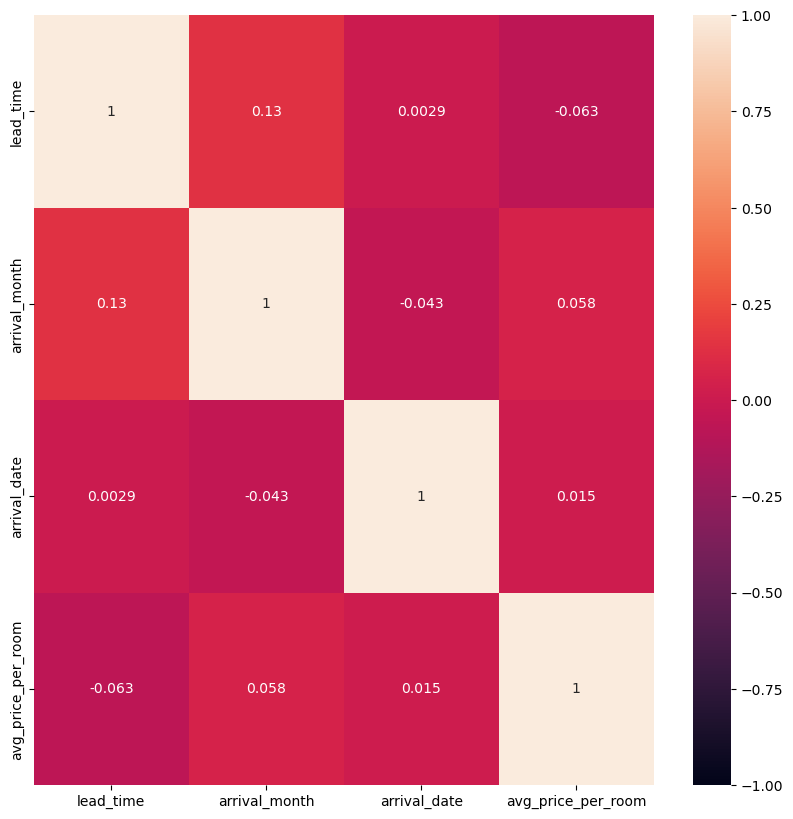

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, vmin= -1, vmax=1)

In [36]:
data.cov()

,lead_time,arrival_month,arrival_date,avg_price_per_room
lead_time,6667.850435,33.611731,2.069307,-163.540800
arrival_month,33.611731,9.424252,-1.147892,5.660617
arrival_date,2.069307,-1.147892,76.395420,4.021126
avg_price_per_room,-163.540800,5.660617,4.021126,1003.699260


In [37]:
data.corr()

,lead_time,arrival_month,arrival_date,avg_price_per_room
lead_time,1.000000,0.134083,0.002899,-0.063217
arrival_month,0.134083,1.000000,-0.042780,0.058202
arrival_date,0.002899,-0.042780,1.000000,0.014522
avg_price_per_room,-0.063217,0.058202,0.014522,1.000000


# visulazation for categorical data

In [38]:
data.describe(include=object)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,arrival_year,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests,booking_status
count,36275,36275,36275,36275,36275,36275,36275,36275,36275,36275,36275,36275,36275,36275
unique,5,6,8,18,4,2,7,2,5,2,9,59,6,2
top,2,0,0,2,0,0,0,2018,4,0,0,0,0,1
freq,26108,33577,16872,11444,27835,35151,28130,29761,23214,35345,35937,35463,19777,24390


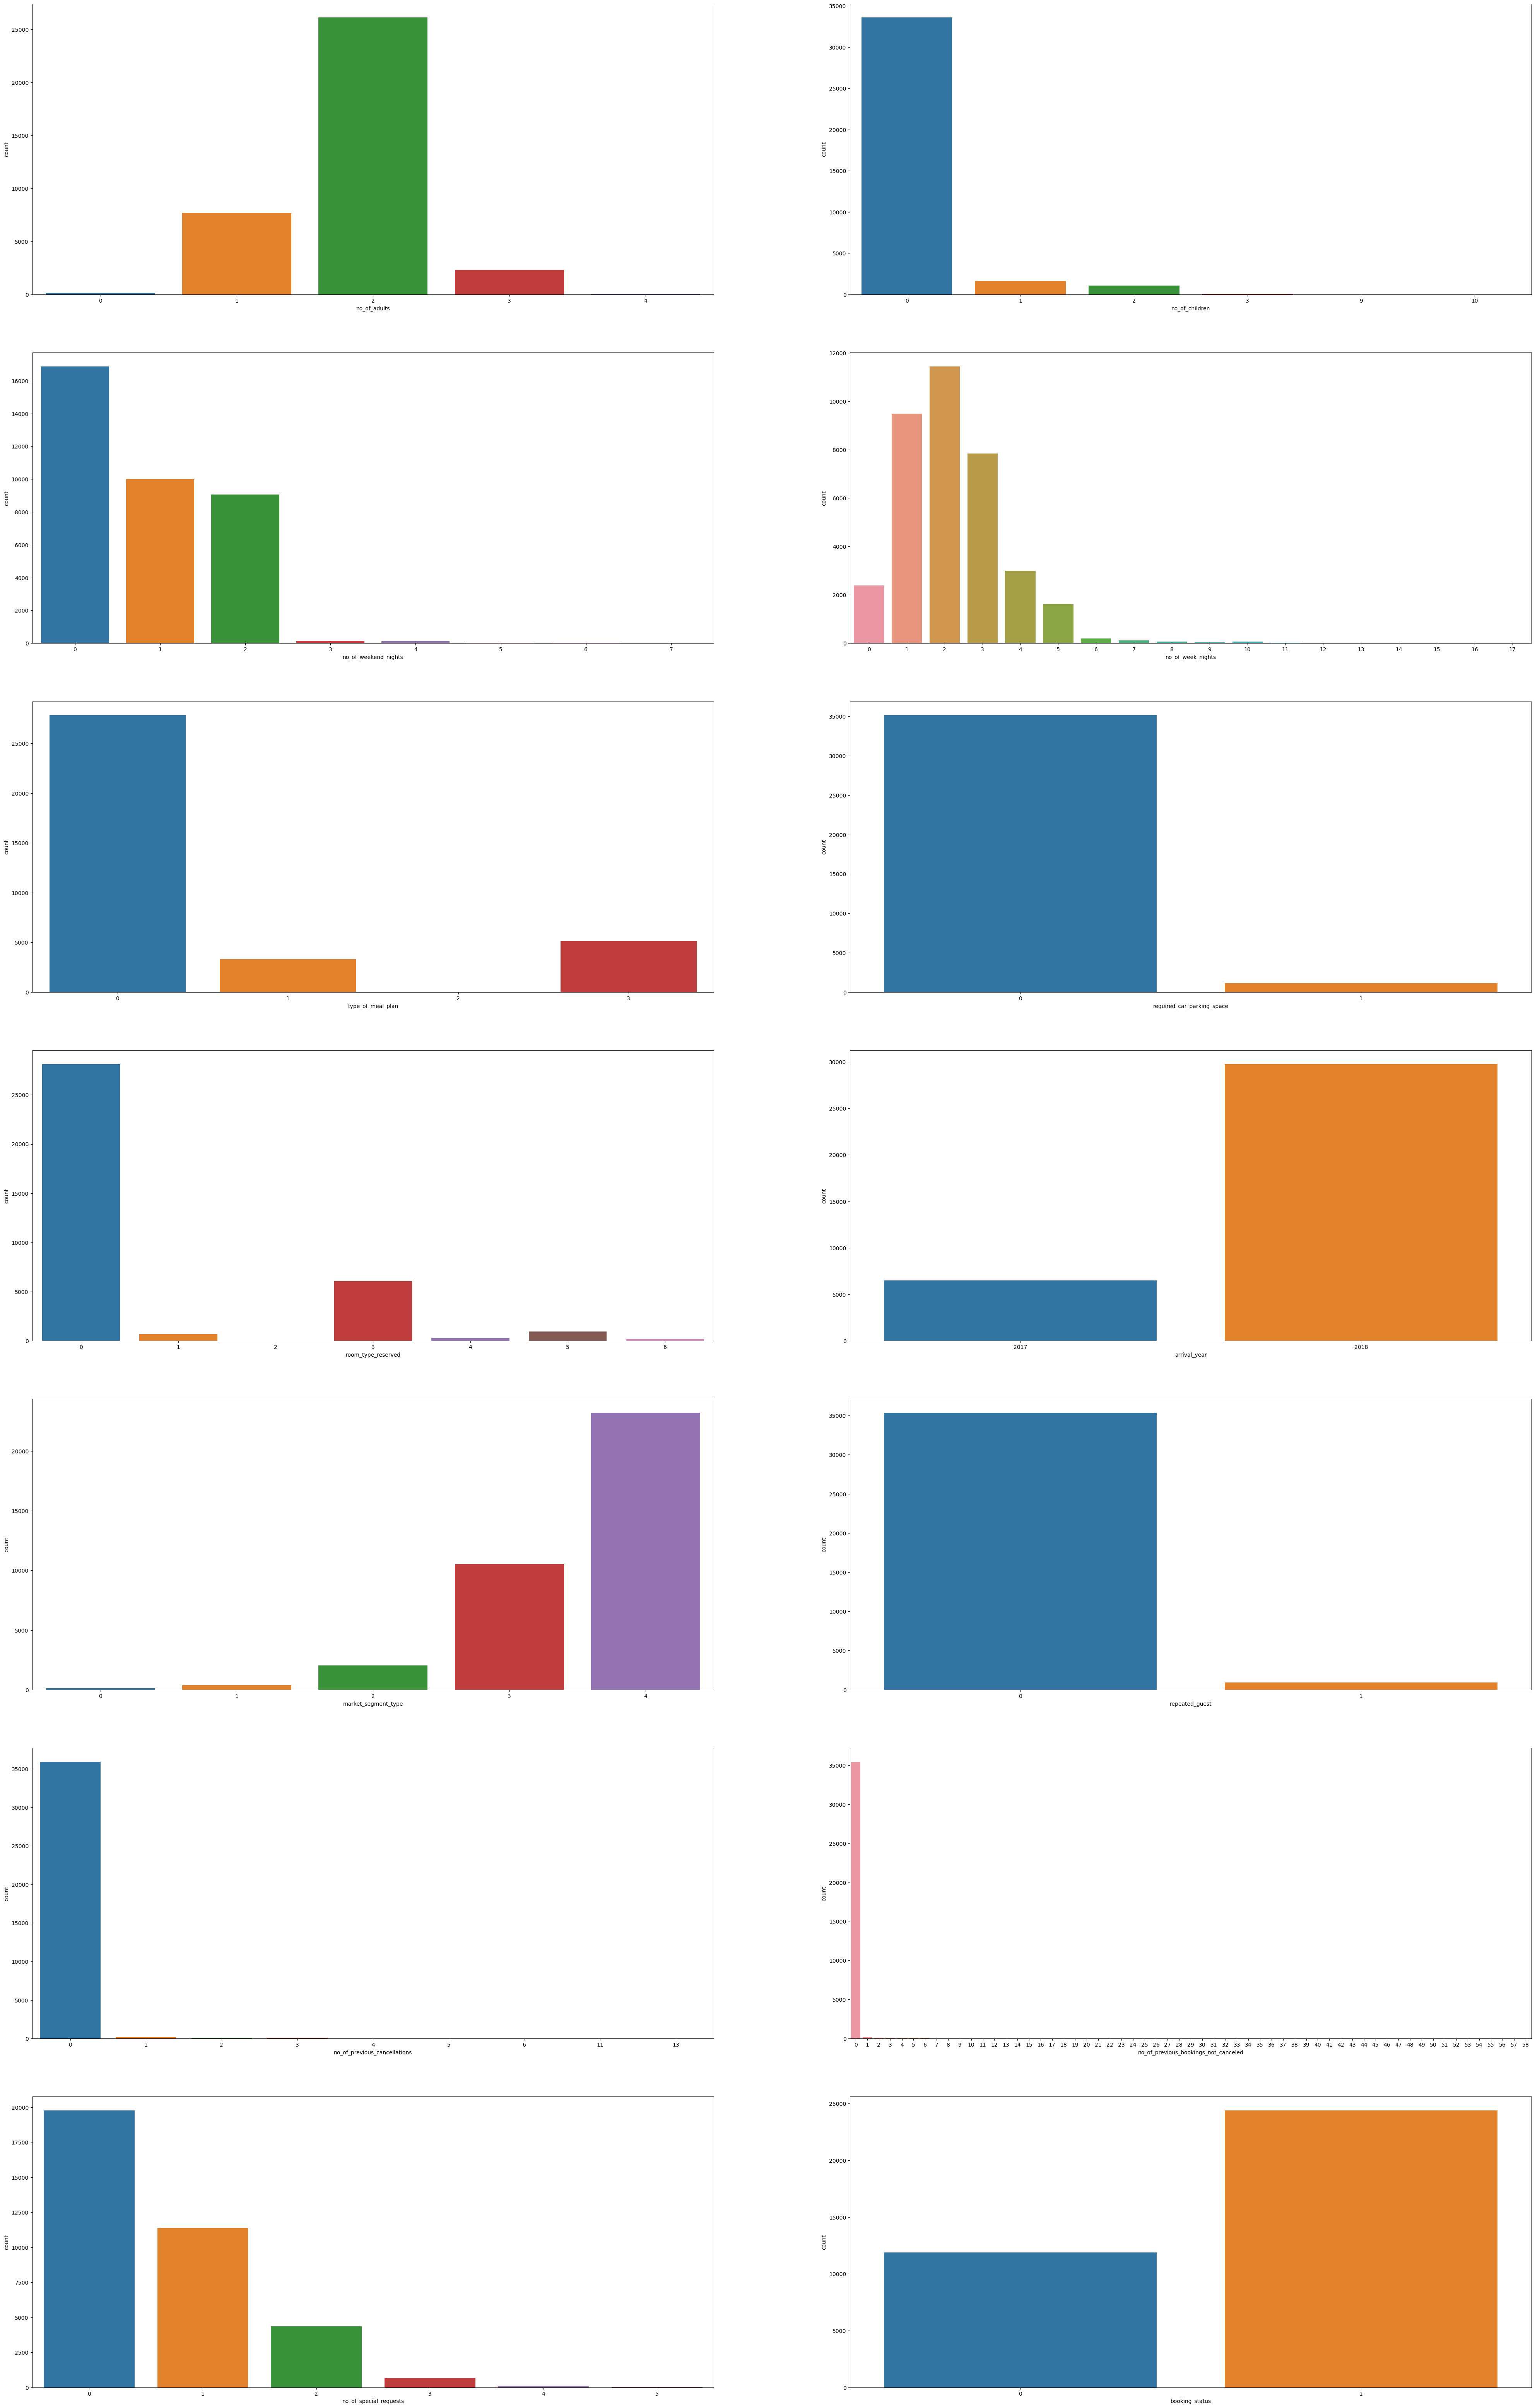

In [39]:
categorical=[]
for column in data:
      if is_string_dtype(data[column]):
        categorical.append(column)      
fig,ax=plt.subplots(nrows=7,ncols=2,figsize=(50,80))
for variable,subplot in zip(categorical,ax.flatten()):
    sns.countplot(data[variable],ax=subplot)
    
plt.show()

In [40]:
categorical

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'type_of_meal_plan',
 'required_car_parking_space',
 'room_type_reserved',
 'arrival_year',
 'market_segment_type',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'no_of_special_requests',
 'booking_status']

In [41]:
le=LabelEncoder()

# statitical test for categorical data

In [42]:
no_of_adults=pd.crosstab(data.booking_status ,data.no_of_adults , margins = True)
scipy.stats.chi2_contingency( no_of_adults ,correction= False )

(339.16395984885366,
 7.926719613649621e-67,
 10,
 array([[   45.54141971,  2521.15988973,  8553.92363887,   759.13287388,
             5.24217781, 11885.        ],
        [   93.45858029,  5173.84011027, 17554.07636113,  1557.86712612,
            10.75782219, 24390.        ],
        [  139.        ,  7695.        , 26108.        ,  2317.        ,
            16.        , 36275.        ]]))

In [43]:
no_of_children=pd.crosstab(data.booking_status ,data.no_of_children , margins = True)
scipy.stats.chi2_contingency( no_of_children ,correction= False )

(55.56303549073348,
 1.4342589803688548e-07,
 12,
 array([[11001.03776706,   530.11523088,   346.63900758,     6.22508615,
             0.65527223,     0.32763611, 11885.        ],
        [22575.96223294,  1087.88476912,   711.36099242,    12.77491385,
             1.34472777,     0.67236389, 24390.        ],
        [33577.        ,  1618.        ,  1058.        ,    19.        ,
             2.        ,     1.        , 36275.        ]]))

In [44]:
no_of_weekend_nights=pd.crosstab(data.booking_status ,data.no_of_weekend_nights , margins = True)
scipy.stats.chi2_contingency(no_of_weekend_nights ,correction= False )

(219.44517953162782,
 9.03804329065824e-38,
 16,
 array([[ 5527.87649897,  3274.72294969,  2971.98718125,    50.12832529,
            42.26505858,    11.13962784,     6.55272226,     0.32763611,
         11885.        ],
        [11344.12350103,  6720.27705031,  6099.01281875,   102.87167471,
            86.73494142,    22.86037216,    13.44727774,     0.67236389,
         24390.        ],
        [16872.        ,  9995.        ,  9071.        ,   153.        ,
           129.        ,    34.        ,    20.        ,     1.        ,
         36275.        ]]))

In [45]:
no_of_week_nights=pd.crosstab(data.booking_status ,data.no_of_week_nights , margins = True)
scipy.stats.chi2_contingency( no_of_week_nights ,correction= False )

(434.5183836997645,
 7.215985295538555e-70,
 36,
 array([[  782.06740179,  3108.61144039,  3749.46767746,  2568.33949001,
           979.63197795,   528.80468642,    61.92322536,    37.02288077,
            20.31343901,    11.13962784,    20.31343901,     5.56981392,
             2.94872502,     1.63818057,     2.29345279,     3.27636113,
             0.65527223,     0.98290834, 11885.        ],
        [ 1604.93259821,  6379.38855961,  7694.53232254,  5270.66050999,
          2010.36802205,  1085.19531358,   127.07677464,    75.97711923,
            41.68656099,    22.86037216,    41.68656099,    11.43018608,
             6.05127498,     3.36181943,     4.70654721,     6.72363887,
             1.34472777,     2.01709166, 24390.        ],
        [ 2387.        ,  9488.        , 11444.        ,  7839.        ,
          2990.        ,  1614.        ,   189.        ,   113.        ,
            62.        ,    34.        ,    62.        ,    17.        ,
             9.        ,     5. 

In [46]:
type_of_meal_plan=pd.crosstab(data.booking_status ,data.type_of_meal_plan , margins = True)
scipy.stats.chi2_contingency(type_of_meal_plan ,correction= False )

(278.2949092058601,
 1.7009804891209094e-55,
 8,
 array([[ 9119.75120606,  1082.83735355,     1.63818057,  1680.77325982,
         11885.        ],
        [18715.24879394,  2222.16264645,     3.36181943,  3449.22674018,
         24390.        ],
        [27835.        ,  3305.        ,     5.        ,  5130.        ,
         36275.        ]]))

In [47]:
required_car_parking_space=pd.crosstab(data.booking_status ,data.required_car_parking_space , margins = True)
scipy.stats.chi2_contingency( required_car_parking_space ,correction= False )

(269.44714368539746,
 4.1971205853739484e-57,
 4,
 array([[11516.73700896,   368.26299104, 11885.        ],
        [23634.26299104,   755.73700896, 24390.        ],
        [35151.        ,  1124.        , 36275.        ]]))

In [48]:
room_type_reserved=pd.crosstab(data.booking_status ,data.room_type_reserved , margins = True)
scipy.stats.chi2_contingency( room_type_reserved ,correction= False )

(57.33495179790708,
 3.422130308891275e-07,
 14,
 array([[ 9216.40385941,   226.72419021,     2.29345279,  1984.4919366 ,
            86.82356995,   316.49648518,    51.76650586, 11885.        ],
        [18913.59614059,   465.27580979,     4.70654721,  4072.5080634 ,
           178.17643005,   649.50351482,   106.23349414, 24390.        ],
        [28130.        ,   692.        ,     7.        ,  6057.        ,
           265.        ,   966.        ,   158.        , 36275.        ]]))

In [49]:
arrival_year=pd.crosstab(data.booking_status ,data.arrival_year , margins = True)
scipy.stats.chi2_contingency( arrival_year ,correction= False )

(1169.1658803091102,
 7.699159060068839e-252,
 4,
 array([[ 2134.22164025,  9750.77835975, 11885.        ],
        [ 4379.77835975, 20010.22164025, 24390.        ],
        [ 6514.        , 29761.        , 36275.        ]]))

In [50]:
market_segment_type=pd.crosstab(data.booking_status ,data.market_segment_type , margins = True)
scipy.stats.chi2_contingency(market_segment_type,correction= False )

(814.108865240557,
 1.910657911754281e-168,
 10,
 array([[   40.95451413,   128.10572019,   660.84203997,  3449.35299793,
          7605.74472777, 11885.        ],
        [   84.04548587,   262.89427981,  1356.15796003,  7078.64700207,
         15608.25527223, 24390.        ],
        [  125.        ,   391.        ,  2017.        , 10528.        ,
         23214.        , 36275.        ]]))

In [51]:
repeated_guest=pd.crosstab(data.booking_status ,data.repeated_guest , margins = True)
scipy.stats.chi2_contingency( repeated_guest ,correction= False )

(417.540569427854,
 4.507765662410317e-89,
 4,
 array([[11580.29841489,   304.70158511, 11885.        ],
        [23764.70158511,   625.29841489, 24390.        ],
        [35345.        ,   930.        , 36275.        ]]))

In [52]:
no_of_previous_cancellations=pd.crosstab(data.booking_status ,data.no_of_previous_cancellations, margins = True)
scipy.stats.chi2_contingency( no_of_previous_cancellations ,correction= False )

(139.28201212369754,
 8.806607096123265e-21,
 18,
 array([[11774.2589938 ,    64.87195038,    15.0712612 ,    14.08835286,
             3.27636113,     3.60399724,     0.32763611,     8.19090283,
             1.31054445, 11885.        ],
        [24162.7410062 ,   133.12804962,    30.9287388 ,    28.91164714,
             6.72363887,     7.39600276,     0.67236389,    16.80909717,
             2.68945555, 24390.        ],
        [35937.        ,   198.        ,    46.        ,    43.        ,
            10.        ,    11.        ,     1.        ,    25.        ,
             4.        , 36275.        ]]))

In [53]:
no_of_previous_bookings_not_canceled=pd.crosstab(data.booking_status ,data.no_of_previous_bookings_not_canceled , margins = True)
scipy.stats.chi2_contingency( no_of_previous_bookings_not_canceled ,correction= False )

(384.33951804935197,
 6.0111448803761715e-30,
 118,
 array([[11618.95947622,    74.70103377,    36.69524466,    26.21088904,
            21.29634735,    19.65816678,    11.79490007,     7.86326671,
             7.5356306 ,     6.22508615,     6.22508615,     4.9145417 ,
             3.93163336,     2.29345279,     2.94872502,     2.6210889 ,
             2.29345279,     1.96581668,     1.96581668,     1.96581668,
             1.96581668,     1.96581668,     1.96581668,     0.98290834,
             0.98290834,     0.98290834,     0.65527223,     0.98290834,
             0.65527223,     0.65527223,     0.65527223,     0.65527223,
             0.65527223,     0.32763611,     0.32763611,     0.32763611,
             0.32763611,     0.32763611,     0.32763611,     0.32763611,
             0.32763611,     0.32763611,     0.32763611,     0.32763611,
             0.65527223,     0.32763611,     0.32763611,     0.32763611,
             0.65527223,     0.32763611,     0.32763611,     0.32763611,

In [54]:
no_of_special_requests=pd.crosstab(data.booking_status ,data.no_of_special_requests , margins = True)
scipy.stats.chi2_contingency(no_of_special_requests ,correction= False )

(2421.6187208019905,
 0.0,
 12,
 array([[ 6479.65940731,  3726.20551344,  1429.80399724,   221.15437629,
            25.55561682,     2.6210889 , 11885.        ],
        [13297.34059269,  7646.79448656,  2934.19600276,   453.84562371,
            52.44438318,     5.3789111 , 24390.        ],
        [19777.        , 11373.        ,  4364.        ,   675.        ,
            78.        ,     8.        , 36275.        ]]))

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  object 
 1   no_of_children                        36275 non-null  object 
 2   no_of_weekend_nights                  36275 non-null  object 
 3   no_of_week_nights                     36275 non-null  object 
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  object 
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  float64
 8   arrival_year                          36275 non-null  object 
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [56]:
data.booking_status.value_counts()

1    24390
0    11885
Name: booking_status, dtype: int64

In [57]:
data['no_of_adults']=data['no_of_adults'].astype("int")
data['no_of_children']=data['no_of_children'].astype("int")
data['no_of_weekend_nights']=data['no_of_weekend_nights'].astype("int")                                                               
data['required_car_parking_space']=data['required_car_parking_space'].astype("int")
data['arrival_year']=data['arrival_year'].astype("int")
data['repeated_guest']=data['repeated_guest'].astype("int")
data['no_of_previous_cancellations']=data['no_of_previous_cancellations'].astype("int")
data['no_of_previous_bookings_not_canceled']=data['no_of_previous_bookings_not_canceled'].astype("int")
data['no_of_special_requests']=data['no_of_special_requests'].astype("int")
data['no_of_week_nights']=data['no_of_week_nights'].astype("int")
data["type_of_meal_plan"]=data["type_of_meal_plan"].astype("int")
data["room_type_reserved"]=data["room_type_reserved"].astype("int")
data["market_segment_type"]=data["market_segment_type"].astype("int")
data["booking_status"]=data["booking_status"].astype("int")

# model building using solver"liblinear"

In [58]:
data.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [59]:
x=data[['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']]
y=data['booking_status']

In [60]:
model1=LogisticRegression(solver="liblinear",random_state=0)
model1    

LogisticRegression(random_state=0, solver='liblinear')

In [61]:
model1.fit(x,y)

LogisticRegression(random_state=0, solver='liblinear')

In [62]:
model1.intercept_

array([0.00024005])

In [63]:
model1.coef_

array([[-0.01793063, -0.02455569, -0.16379863, -0.06507022, -0.11682451,
         0.22599613,  0.06357203, -0.01480815,  0.00355129,  0.05909833,
        -0.00331483, -0.98800248,  0.04593947,  0.00817898,  0.12259927,
        -0.02139223,  1.38182997]])

In [64]:
y_pred=model1.predict(x)

In [65]:
confusion_matrix=metrics.confusion_matrix(y,y_pred)
confusion_matrix

array([[ 7203,  4682],
       [ 2564, 21826]], dtype=int64)

In [66]:
model1.score(x,y)

0.8002481047553411

In [67]:
#classification report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.61      0.67     11885
           1       0.82      0.89      0.86     24390

    accuracy                           0.80     36275
   macro avg       0.78      0.75      0.76     36275
weighted avg       0.80      0.80      0.79     36275



In [68]:
# roc curve
y_pred_prob=model1.predict_proba(x)
y_pred_prob

array([[0.56310642, 0.43689358],
       [0.12330985, 0.87669015],
       [0.17782129, 0.82217871],
       ...,
       [0.20775635, 0.79224365],
       [0.53854973, 0.46145027],
       [0.88504473, 0.11495527]])

In [69]:
fpr,tpr,threshold=roc_curve(data["booking_status"],y_pred_prob[:,1])

In [70]:
roc_auc=auc(fpr,tpr)
print(roc_auc)

0.8523611458243316


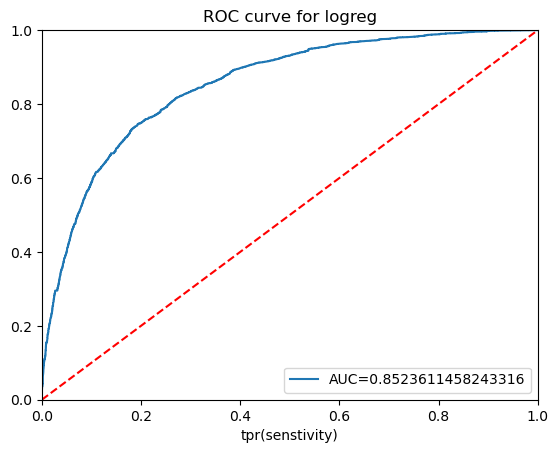

In [71]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr,tpr,label="AUC="+str(roc_auc))
plt.legend(loc=4)
plt.show()

# model 2 using solver"lbfgs"

In [72]:
model2=LogisticRegression(solver="lbfgs",random_state=0)
model2   

LogisticRegression(random_state=0)

In [73]:
model2.fit(x,y)

LogisticRegression(random_state=0)

In [74]:
model2.intercept_

array([0.00010144])

In [75]:
model2.coef_

array([[ 0.00825086, -0.00733268, -0.219724  , -0.04848209, -0.2192091 ,
         0.11543938, -0.0467018 , -0.01386393,  0.00265553,  0.04496499,
        -0.00221261, -0.52230504,  0.03094791,  0.01468086,  0.14083493,
        -0.01907641,  1.26996713]])

In [76]:
y_pred=model2.predict(x)

In [77]:
confusion_matrix=metrics.confusion_matrix(y,y_pred)
confusion_matrix

array([[ 6861,  5024],
       [ 2566, 21824]], dtype=int64)

In [78]:
model2.score(x,y)

0.7907649896623019

In [79]:
#classification report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.58      0.64     11885
           1       0.81      0.89      0.85     24390

    accuracy                           0.79     36275
   macro avg       0.77      0.74      0.75     36275
weighted avg       0.79      0.79      0.78     36275



In [80]:
# roc curve
y_pred_prob=model2.predict_proba(x)
fpr2,tpr2,threshold=roc_curve(data["booking_status"],y_pred_prob[:,1])
roc_auc2=auc(fpr2,tpr2)
print(roc_auc2)

0.8466214885960387


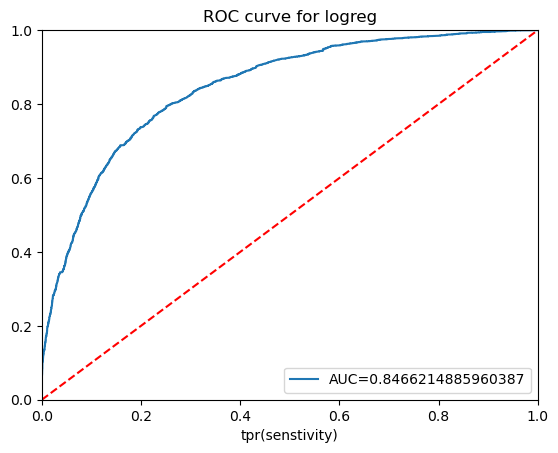

In [81]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr2,tpr2,label="AUC="+str(roc_auc2))
plt.legend(loc=4)
plt.show()

# model 3 using solver"newton-cg"

In [82]:
model3=LogisticRegression(solver="newton-cg",random_state=0)
model3 

LogisticRegression(random_state=0, solver='newton-cg')

In [83]:
model3.fit(x,y)

LogisticRegression(random_state=0, solver='newton-cg')

In [84]:
model3.intercept_

array([673.17015908])

In [85]:
model3.coef_

array([[-0.00964081, -0.04890253, -0.14094641, -0.04814549, -0.1161205 ,
         1.45888145,  0.07403465, -0.01484246, -0.32979877,  0.04803436,
        -0.0032129 , -1.15857686,  1.22046045, -0.122867  ,  0.06142506,
        -0.02051669,  1.3640567 ]])

In [86]:
y_pred=model3.predict(x)

In [87]:
confusion_matrix=metrics.confusion_matrix(y,y_pred)
confusion_matrix

array([[ 7342,  4543],
       [ 2620, 21770]], dtype=int64)

In [88]:
model3.score(x,y)

0.8025361819434873

In [89]:
#classification report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.62      0.67     11885
           1       0.83      0.89      0.86     24390

    accuracy                           0.80     36275
   macro avg       0.78      0.76      0.77     36275
weighted avg       0.80      0.80      0.80     36275



In [90]:
# roc curve
y_pred_prob=model3.predict_proba(x)
fpr3,tpr3,threshold=roc_curve(data["booking_status"],y_pred_prob[:,1])
roc_auc3=auc(fpr3,tpr3)
print(roc_auc3)

0.8567744699744011


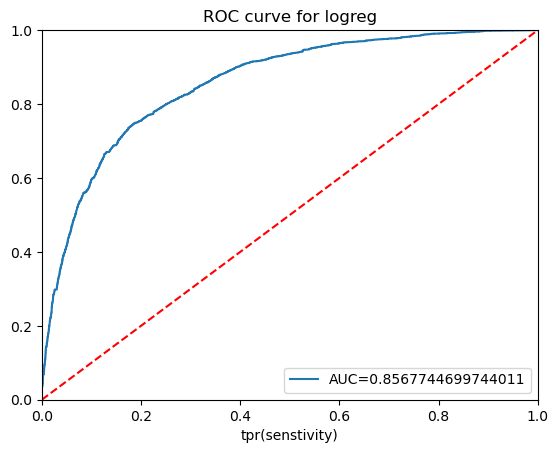

In [91]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr3,tpr3,label="AUC="+str(roc_auc3))
plt.legend(loc=4)
plt.show()

# mode4 using solver="sag"

In [92]:
model4=LogisticRegression(solver="sag",random_state=0)
model4 

LogisticRegression(random_state=0, solver='sag')

In [93]:
model4.fit(x,y)

LogisticRegression(random_state=0, solver='sag')

In [94]:
model4.intercept_

array([0.00001883])

In [95]:
model4.coef_

array([[ 0.00498393,  0.00309621, -0.04971494, -0.03563641, -0.09563463,
         0.01947137,  0.02914678, -0.01368527,  0.00181417,  0.08372533,
        -0.00158855, -0.08810698,  0.00581193,  0.0030165 ,  0.02707092,
        -0.01859247,  0.25567948]])

In [96]:
y_pred=model4.predict(x)

In [97]:
confusion_matrix=metrics.confusion_matrix(y,y_pred)
confusion_matrix

array([[ 5901,  5984],
       [ 2308, 22082]], dtype=int64)

In [98]:
model4.score(x,y)

0.7714128187456927

In [99]:
#classification report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.50      0.59     11885
           1       0.79      0.91      0.84     24390

    accuracy                           0.77     36275
   macro avg       0.75      0.70      0.71     36275
weighted avg       0.76      0.77      0.76     36275



In [100]:
# roc curve
y_pred_prob=model4.predict_proba(x)
fpr4,tpr4,threshold=roc_curve(data["booking_status"],y_pred_prob[:,1])
roc_auc4=auc(fpr4,tpr4)
print(roc_auc4)

0.8110906885257325


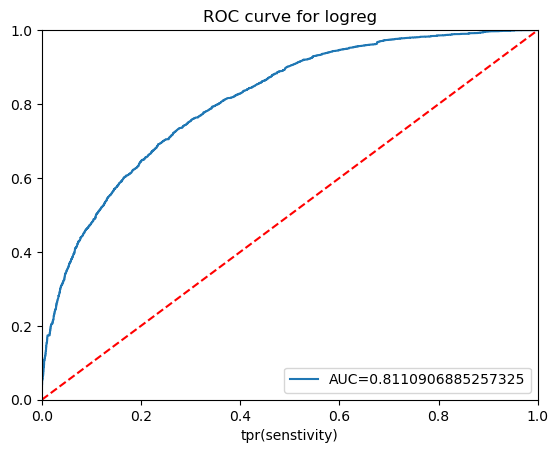

In [101]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr4,tpr4,label="AUC="+str(roc_auc4))
plt.legend(loc=4)
plt.show()

# mode5 using solver="saga"

In [102]:
model5=LogisticRegression(solver="saga",random_state=0)
model5

LogisticRegression(random_state=0, solver='saga')

In [103]:
model5.fit(x,y)

LogisticRegression(random_state=0, solver='saga')

In [104]:
model5.intercept_

array([0.0000107])

In [105]:
model5.coef_

array([[ 0.0028576 ,  0.00204541, -0.02752903, -0.02166982, -0.05533198,
         0.01002643,  0.01858075, -0.01365085,  0.00171182,  0.07831762,
        -0.00158946, -0.0456489 ,  0.00323239,  0.0017359 ,  0.0160749 ,
        -0.01765052,  0.13941427]])

In [106]:
y_pred=model5.predict(x)

In [107]:
confusion_matrix=metrics.confusion_matrix(y,y_pred)
confusion_matrix

array([[ 5739,  6146],
       [ 2342, 22048]], dtype=int64)

In [108]:
model5.score(x,y)

0.7660096485182633

In [109]:
#classification report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.48      0.57     11885
           1       0.78      0.90      0.84     24390

    accuracy                           0.77     36275
   macro avg       0.75      0.69      0.71     36275
weighted avg       0.76      0.77      0.75     36275



In [110]:
# roc curve
y_pred_prob=model4.predict_proba(x)
fpr5,tpr5,threshold=roc_curve(data["booking_status"],y_pred_prob[:,1])
roc_auc5=auc(fpr5,tpr5)
print(roc_auc5)

0.8110906885257325


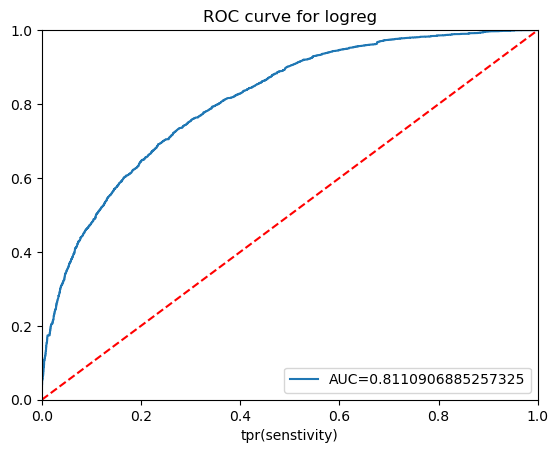

In [111]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr5,tpr5,label="AUC="+str(roc_auc5))
plt.legend(loc=4)
plt.show()

# evaluvating the model 

In [112]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [113]:
print (x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(29020, 17) (7255, 17) (29020,) (7255,)


In [114]:
model6 = LogisticRegression()

In [115]:
model6.fit(x_train, y_train)

LogisticRegression()

In [116]:
model6.intercept_

array([0.00009686])

In [117]:
model6.coef_

array([[-0.01136464,  0.00382513, -0.22242606, -0.06567032, -0.23750174,
         0.12567843, -0.04170503, -0.0144743 ,  0.00278361,  0.06960672,
        -0.00382635, -0.54353864,  0.03146916,  0.00983429,  0.14272114,
        -0.02095836,  1.33974388]])

In [118]:
y_pred = model6.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [119]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[1416, 1000],
       [ 491, 4348]], dtype=int64)

In [120]:
model6.score(x_train,y_train)

0.7917298414886286

In [121]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.59      0.66      2416
           1       0.81      0.90      0.85      4839

    accuracy                           0.79      7255
   macro avg       0.78      0.74      0.75      7255
weighted avg       0.79      0.79      0.79      7255



In [122]:
# roc curve
y_pred_prob=model4.predict_proba(x_test)
fpr6,tpr6,threshold=roc_curve(y_test,y_pred_prob[:,1])
roc_auc6=auc(fpr6,tpr6)
print(roc_auc6)

0.8167559573909009


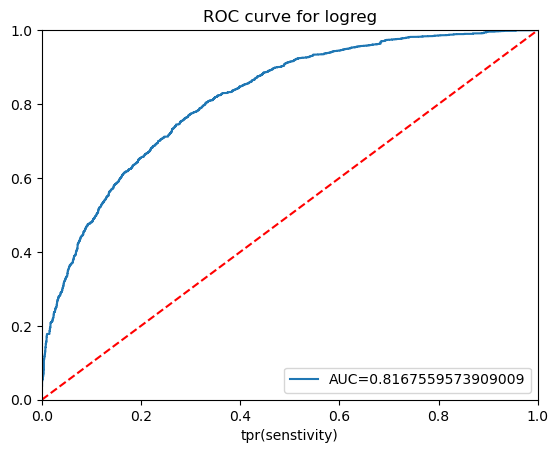

In [123]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr6,tpr6,label="AUC="+str(roc_auc6))
plt.legend(loc=4)
plt.show()

# decision tree

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int32  
 1   no_of_children                        36275 non-null  int32  
 2   no_of_weekend_nights                  36275 non-null  int32  
 3   no_of_week_nights                     36275 non-null  int32  
 4   type_of_meal_plan                     36275 non-null  int32  
 5   required_car_parking_space            36275 non-null  int32  
 6   room_type_reserved                    36275 non-null  int32  
 7   lead_time                             36275 non-null  float64
 8   arrival_year                          36275 non-null  int32  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [125]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size = 0.20, random_state = 1)

In [126]:
print (x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(29020, 17) (7255, 17) (29020,) (7255,)


In [127]:
from sklearn.tree import DecisionTreeClassifier

In [128]:
clf=tree.DecisionTreeClassifier(random_state=40)

In [129]:
model7=clf.fit(x_train, y_train)

In [130]:
y_train_pred= model7.predict(x_train)
y_train_pred

array([1, 0, 0, ..., 0, 1, 0])

In [131]:
y_test_pred= model7.predict(x_test)
y_test_pred

array([0, 1, 0, ..., 1, 1, 1])

In [132]:
accuracy_score(y_train,y_train_pred)

0.993762922122674

In [133]:
accuracy_score(y_test,y_test_pred)

0.8690558235699517

In [134]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

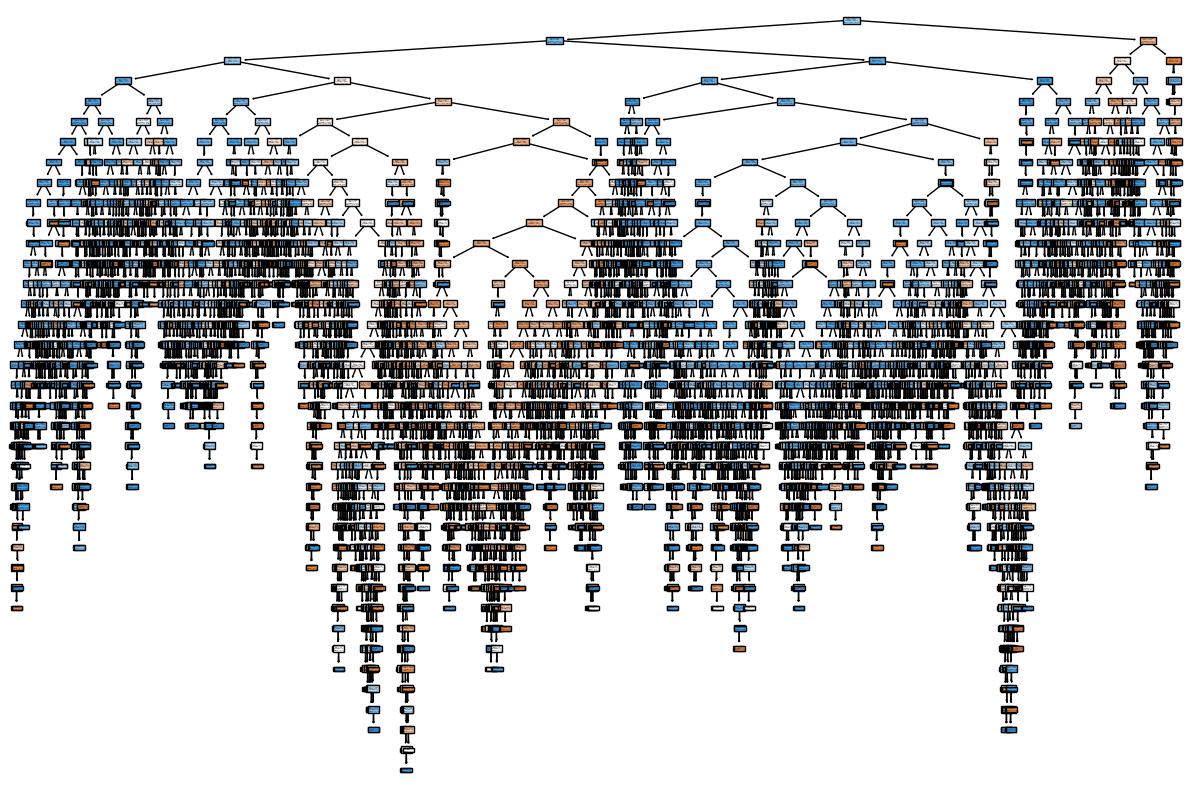

In [135]:
plt.figure(figsize=(15,10))
a = plot_tree(model7,filled=True)
plt.show()

In [136]:
model7.get_depth()

37

In [137]:
depth = [1,2,3,4,5,6,7,8,9,10]

accuracy_train,accuracy_test= [],[]

for i in depth:
    tree = DecisionTreeClassifier(max_depth= i, random_state=50)
    
    tree.fit(x_train, y_train)
    y_train_pred1=tree.predict(x_train)
    y_test_pred1=tree.predict(x_test)
    
    accuracy_train.append(accuracy_score(y_train, y_train_pred1))
    accuracy_test.append(accuracy_score(y_test, y_test_pred1))

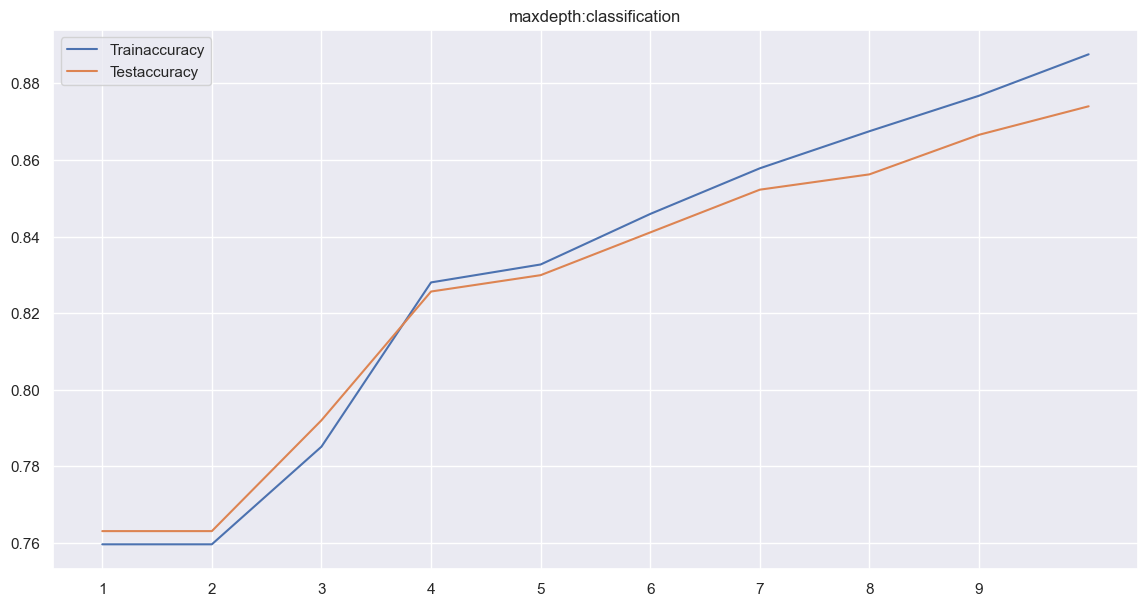

In [138]:
sns.set()
plt.figure(figsize = (14,7))
sns.lineplot(y=accuracy_train,x = depth, label = 'Trainaccuracy')
sns.lineplot(y=accuracy_test, x = depth, label = 'Testaccuracy')
plt.title("maxdepth:classification")
plt.xticks(ticks=np.arange(1,10,1))
plt.show()

In [139]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[ 632, 1716],
       [1275, 3632]], dtype=int64)

In [140]:
tree2= DecisionTreeClassifier(max_depth=3, random_state=50)    
tree2.fit(x_train, y_train)
y_train_pred2=tree2.predict(x_train)
y_train_pred2

array([1, 1, 0, ..., 0, 0, 1])

In [141]:
y_test_pred2=tree2.predict(x_test)
y_test_pred2

array([0, 1, 0, ..., 1, 1, 1])

In [142]:
accuracytrain=(accuracy_score(y_train, y_train_pred2))
accuracytrain

0.7851137146795314

In [143]:
accuracytest=(accuracy_score(y_test, y_test_pred2))
accuracytest

0.7920055134390076

In [144]:
# roc curve
y_pred_prob=tree2.predict_proba(x_test)
fpr7,tpr7,threshold=roc_curve(y_test,y_pred_prob[:,-1])
roc_auc7=auc(fpr7,tpr7)
print(roc_auc7)

0.8202422381682603


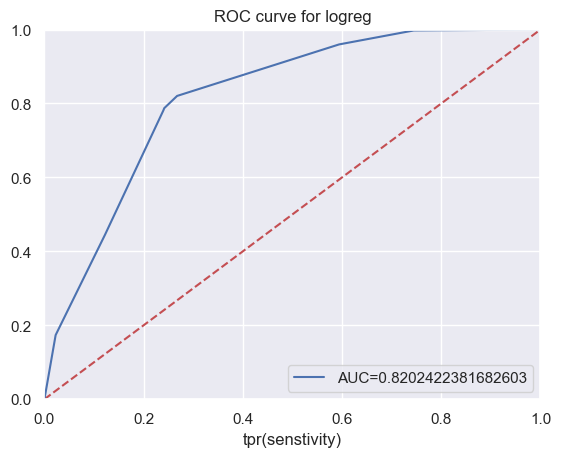

In [145]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr7,tpr7,label="AUC="+str(roc_auc7))
plt.legend(loc=4)
plt.show()

# MODEL -BAGGING

In [146]:
model9= BaggingClassifier(n_estimators=10, random_state=0)

In [147]:
model9=clf.fit(x_train,y_train)
model9

DecisionTreeClassifier(random_state=40)

In [148]:
y_predB=model9.predict(x_test)
y_predB

array([0, 1, 0, ..., 1, 1, 1])

In [149]:
pd.crosstab(y_test,y_predB,margins=True,rownames=['Actual'],colnames=['preddict'])

preddict,0,1,All
Actual,,,
0,1896,452,2348
1,498,4409,4907
All,2394,4861,7255


In [150]:
confusion_matrix=metrics.confusion_matrix(y_test,y_predB)
confusion_matrix

array([[1896,  452],
       [ 498, 4409]], dtype=int64)

In [151]:
print(classification_report(y_test, y_predB))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      2348
           1       0.91      0.90      0.90      4907

    accuracy                           0.87      7255
   macro avg       0.85      0.85      0.85      7255
weighted avg       0.87      0.87      0.87      7255



In [152]:
# roc curve
y_pred_prob=model9.predict_proba(x_test)
fpr9,tpr9,threshold=roc_curve(y_test,y_pred_prob[:,-1])
roc_auc9=auc(fpr9,tpr9)
print(roc_auc9)

0.8557814619382178


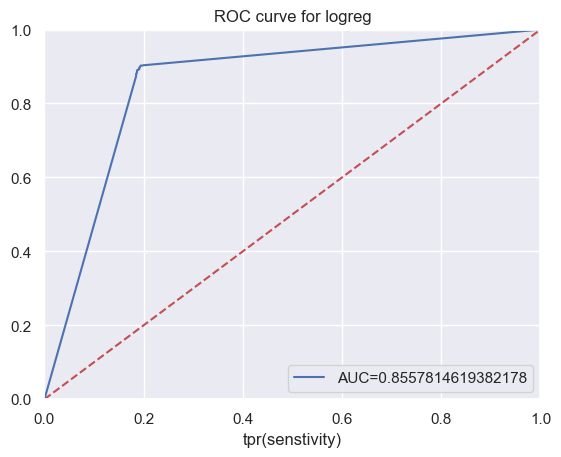

In [153]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr9,tpr9,label="AUC="+str(roc_auc9))
plt.legend(loc=4)
plt.show()

# Random forest

In [154]:
model8= RandomForestClassifier(n_estimators =100, max_depth = None, random_state = 0 )
model8

RandomForestClassifier(random_state=0)

In [155]:
model8.fit(x_train,y_train)
model8

RandomForestClassifier(random_state=0)

In [156]:
y_predRF= model8.predict(x_test)
y_predRF

array([0, 1, 0, ..., 1, 1, 1])

In [157]:
pd.crosstab(y_test,y_predRF,margins=True,rownames=['Actual'],colnames=['preddict'])

preddict,0,1,All
Actual,,,
0,1922,426,2348
1,246,4661,4907
All,2168,5087,7255


In [158]:
confusion_matrix=metrics.confusion_matrix(y_test,y_predRF)
confusion_matrix

array([[1922,  426],
       [ 246, 4661]], dtype=int64)

In [159]:
print(classification_report(y_test, y_predRF))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85      2348
           1       0.92      0.95      0.93      4907

    accuracy                           0.91      7255
   macro avg       0.90      0.88      0.89      7255
weighted avg       0.91      0.91      0.91      7255



In [160]:
# roc curve
y_pred_prob=model8.predict_proba(x_test)
fpr8,tpr8,threshold=roc_curve(y_test,y_pred_prob[:,-1])
roc_auc8=auc(fpr8,tpr8)
print(roc_auc8)

0.9599399772740608


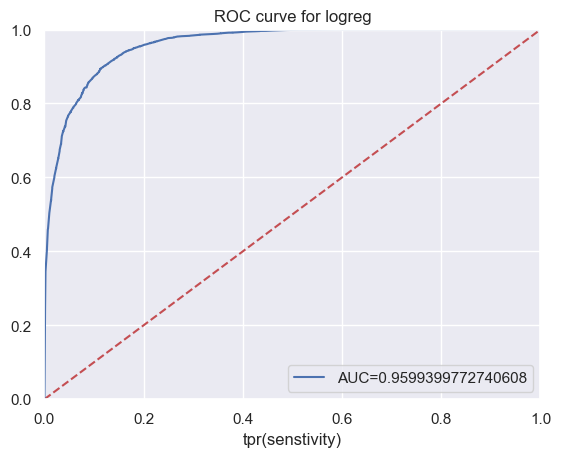

In [161]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr8,tpr8,label="AUC="+str(roc_auc8))
plt.legend(loc=4)
plt.show()

# RANDOM FOREST USING BOOTSTRAP

In [162]:
#model10=RandomForestClassifier(n_estimators =100,bootstrap=True,max_features='sqrt')


In [163]:
model10=RandomForestClassifier(n_estimators =100,bootstrap=True,max_features='log2')


In [164]:
#model10=RandomForestClassifier(n_estimators =100,bootstrap=True,max_features='auto')


In [165]:
model10=model10.fit(x_train,y_train)
model10

RandomForestClassifier(max_features='log2')

In [166]:
#predictions

In [167]:
y_predRFB=model10.predict(x_test)

In [168]:
len(y_pred)

7255

In [169]:
y_predRFB

array([0, 1, 0, ..., 1, 1, 1])

In [170]:
#result&report

In [171]:
pd.crosstab(y_test,y_predRFB,margins=True,rownames=['Actual'],colnames=['preddict'])

preddict,0,1,All
Actual,,,
0,1920,428,2348
1,247,4660,4907
All,2167,5088,7255


In [172]:
print(classification_report(y_test, y_predRFB))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85      2348
           1       0.92      0.95      0.93      4907

    accuracy                           0.91      7255
   macro avg       0.90      0.88      0.89      7255
weighted avg       0.91      0.91      0.91      7255



In [173]:
y_pred_prob=model10.predict_proba(x_test)
fpr10,tpr10,threshold=roc_curve(y_test,y_pred_prob[:,-1])
roc_auc10=auc(fpr10,tpr10)
print(roc_auc10)

0.958377742535869


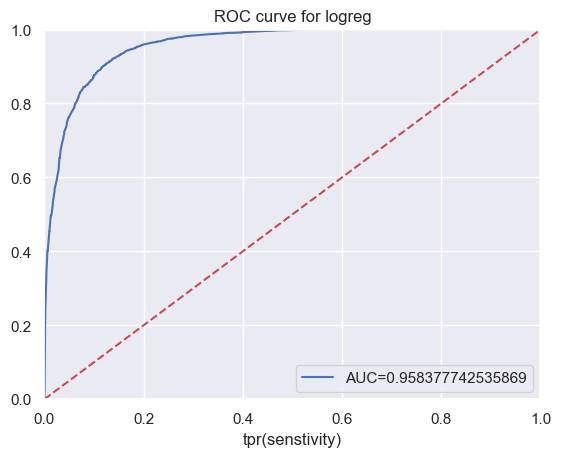

In [174]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr10,tpr10,label="AUC="+str(roc_auc10))
plt.legend(loc=4)
plt.show()

# Adaptive boosting

In [175]:
model11= AdaBoostClassifier(DecisionTreeClassifier(max_depth=None),n_estimators =100)
model11

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [176]:
model11 = model11.fit(x_train,y_train)
model11 

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [177]:
y_predAB=model11.predict(x_test)
y_predAB

array([0, 1, 0, ..., 1, 1, 1])

In [178]:
pd.crosstab(y_test,y_predAB,margins=True,rownames=['Actual'],colnames=['preddict'])

preddict,0,1,All
Actual,,,
0,1855,493,2348
1,298,4609,4907
All,2153,5102,7255


In [179]:
print(classification_report(y_test,y_predAB))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82      2348
           1       0.90      0.94      0.92      4907

    accuracy                           0.89      7255
   macro avg       0.88      0.86      0.87      7255
weighted avg       0.89      0.89      0.89      7255



In [180]:
y_pred_prob=model11.predict_proba(x_test)
fpr11,tpr11,threshold=roc_curve(y_test,y_pred_prob[:,-1])
roc_auc11=auc(fpr11,tpr11)
print(roc_auc11)

0.9287206695299175


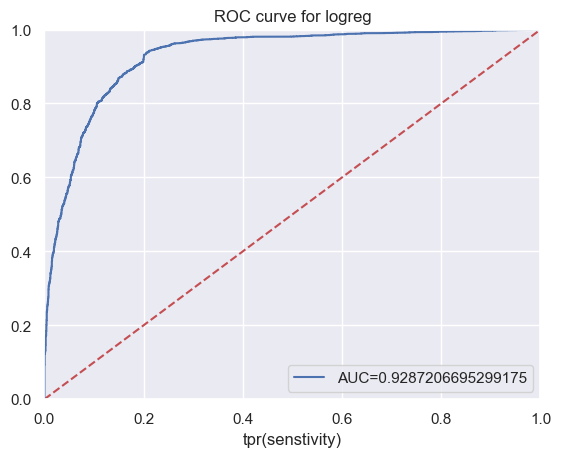

In [181]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr11,tpr11,label="AUC="+str(roc_auc11))
plt.legend(loc=4)
plt.show()

# gradient boosting

In [182]:
model12= GradientBoostingClassifier(max_depth=1,n_estimators =50,learning_rate=1.0,random_state=0)
model12

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, n_estimators=50,
                           random_state=0)

In [183]:
model12 = model12.fit(x_train,y_train)
model12

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, n_estimators=50,
                           random_state=0)

In [184]:
y_predGB=model12.predict(x_test)
print(y_predGB)

[1 1 0 ... 1 1 1]


In [185]:
pd.crosstab(y_test,y_predGB,margins=True,rownames=['Actual'],colnames=['preddict'])

preddict,0,1,All
Actual,,,
0,1571,777,2348
1,523,4384,4907
All,2094,5161,7255


In [186]:
print(classification_report(y_test,y_predGB))

              precision    recall  f1-score   support

           0       0.75      0.67      0.71      2348
           1       0.85      0.89      0.87      4907

    accuracy                           0.82      7255
   macro avg       0.80      0.78      0.79      7255
weighted avg       0.82      0.82      0.82      7255



In [187]:
y_pred_prob=model12.predict_proba(x_test)
fpr12,tpr12,threshold=roc_curve(y_test,y_pred_prob[:,-1])
roc_auc12=auc(fpr12,tpr12)
print(roc_auc12)

0.8773300076482193


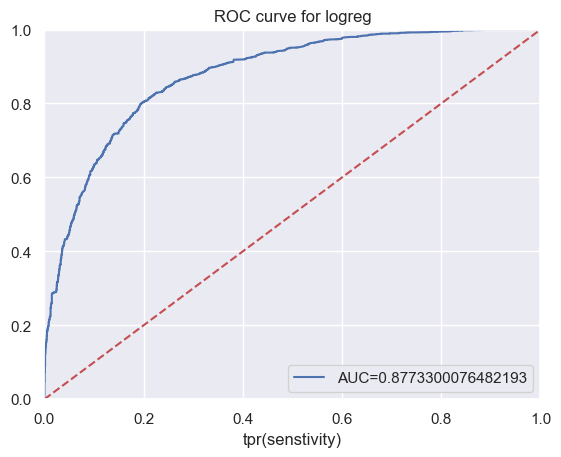

In [188]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr12,tpr12,label="AUC="+str(roc_auc12))
plt.legend(loc=4)
plt.show()

# navie baye classifier

In [189]:
model13=GaussianNB()

In [190]:
model13=model13.fit(x_train,y_train)

In [191]:
y_pred=model13.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [192]:
pd.crosstab(y_test,y_pred,margins=True,rownames=['Actual'],colnames=['preddict'])

preddict,0,1,All
Actual,,,
0,2300,48,2348
1,4141,766,4907
All,6441,814,7255


In [193]:
accuracy_score(y_test,y_pred)

0.42260509993108203

In [194]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.36      0.98      0.52      2348
           1       0.94      0.16      0.27      4907

    accuracy                           0.42      7255
   macro avg       0.65      0.57      0.40      7255
weighted avg       0.75      0.42      0.35      7255



In [195]:
y_pred_prob=model13.predict_proba(x_test)
fpr13,tpr13,threshold=roc_curve(y_test,y_pred_prob[:,1])
roc_auc13=auc(fpr13,tpr13)
print(roc_auc13)

0.8089506559658715


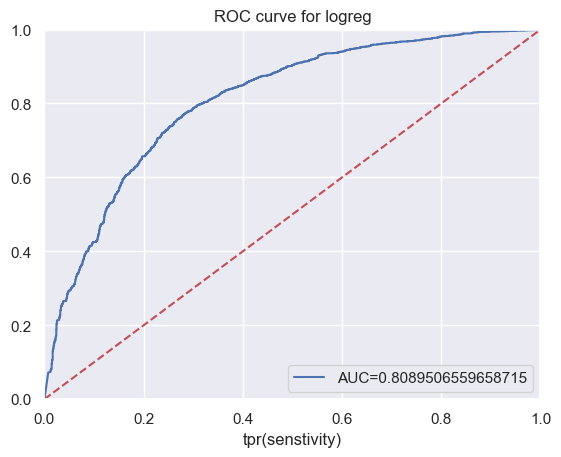

In [196]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr13,tpr13,label="AUC="+str(roc_auc13))
plt.legend(loc=4)
plt.show()

In [197]:
#Knn neighbour

In [198]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5,weights='uniform',algorithm='ball_tree',leaf_size=30,p=2,metric='minkowski',metric_params=None,n_jobs=None)

In [199]:
model14=model.fit(x_train,y_train)

In [200]:
y_pred=model14.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [201]:
pd.crosstab(y_test,y_pred,margins=True)

col_0,0,1,All
booking_status,,,
0,1495,853,2348
1,537,4370,4907
All,2032,5223,7255


In [202]:
accuracy_score(y_test,y_pred)

0.808407994486561

In [203]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.64      0.68      2348
           1       0.84      0.89      0.86      4907

    accuracy                           0.81      7255
   macro avg       0.79      0.76      0.77      7255
weighted avg       0.80      0.81      0.80      7255



In [204]:
y_pred_prob=model14.predict_proba(x_test)
fpr14,tpr14,threshold=roc_curve(y_test,y_pred_prob[:,1])
roc_auc14=auc(fpr14,tpr14)
print(roc_auc14)

0.8530685659571263


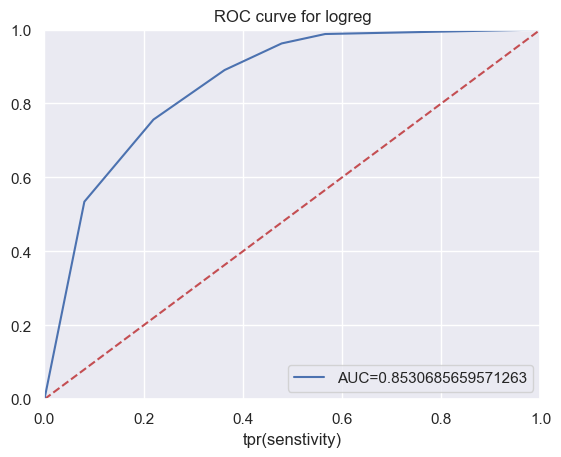

In [205]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr14,tpr14,label="AUC="+str(roc_auc14))
plt.legend(loc=4)
plt.show()